In [12]:
from IPython.display import display, Math

In [1]:
# As seguintes librarias serão necessárias para resolver os exercícios
import numpy as np # O numpy permite efetuar cálculos de forma eficiente
                   # sobre vários números (arrays)
import matplotlib.pyplot as plt # O matplotlib e o seu módulo pyplot oferecem
                                # uma interface simples para gerar gráficos

# Exercício 1

Uma mola exerce uma força $F_x = -k x(t)$, em que $k$ é a constante elástica da mola, num corpo de massa $m$.

Considere $k$ = 1 N/m e $m$ = 1 kg.

In [2]:
# Dados
k = 1
m = 1

## Alínea A

Calcule numericamente a lei do movimento, no caso em que a velocidade inicial é nula e a posição inicial 4 m.

O cálculo númerico da lei do movimento pode ser feito através do método de Euler-Cromer (queremos utilizar o método de Euler-Cromer em vez do método de Euler, pois este conserva a energia mecânica em movimentos oscilatórios).

É nos dada a força, logo basta dividir pela massa para obter a aceleração.

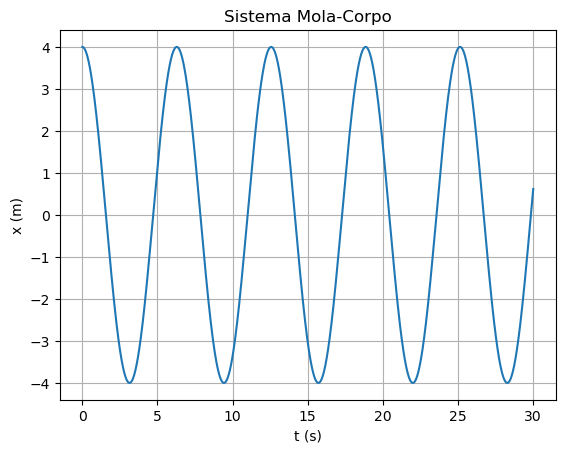

In [127]:
# Parâmetros
dt = 0.001 # δt - tamanho do passo
t0 = 0 # Tempo inicial
tf = 30.0 # Tempo final
x0 = 4 # Posição inicial
v0 = 0 # Velocidade inicial

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1) # Tempo
x = np.zeros(n + 1) # Posição
v = np.zeros(n + 1) # Velocidade
a = np.zeros(n + 1) # Aceleração

# Valores inicias
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
  a[i] = -(k/m) * x[i] # Força a dividir por massa
  v[i + 1] = v[i] + a[i] * dt
  x[i + 1] = x[i] + v[i + 1] * dt 
  t[i + 1] = t[i] + dt

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

## Alínea B

Calcule a amplitude do movimento e o seu período, usando interpolação dos resultados numéricos.

A interpolação consiste em através de pontos de controlo, calcular as posições dos restantes pontos entre eles.

A seguinte função interpola um extremo de uma parabóla através de três pontos de controlo.

In [128]:
def interpolate_extremum(x0, y0, x1, y1, x2, y2):
    """Calculates a maximum or minimum (extremum) using Lagrange's polynomial
    
    Parameters
    ----------
    x0, y0 : float
        Coordinates of the first point to sample from
    x1, y1 : float
        Coordinates of the second point to sample from
    x2, y2 : float
        Coordinates of the third point to sample from
    
    Returns
    ----------
    xm: float
        The coordinate of the extremum
    ym: float
        The extremum
    """
    xab = x0-x1
    xac = x0-x2
    xbc = x1-x2
    
    a = y0/(xab*xac)
    b = -y1/(xab*xbc)
    c = y2/(xac*xbc)
    
    xmla = (b+c)*x0+(a+c)*x1+(a+b)*x2
    xm = xmla/(2*(a+b+c))
    
    xta = xm-x0
    xtb = xm-x1
    xtc = xm-x2
    
    ymax = a*xtb*xtc+b*xta*xtc+c*xta*xtb
    return xm, ymax

Podemos calcular a amplitude se calcularmos a amplitude de um máximo e de um mínimo, subtrairmos os valores e dividir-mos por dois.

Na escolha dos pontos é importante escolher pontos antes e depois do extremo (os pontos a interpolar têm de estar entre os pontos de controlo) mas tendo em atenção que os pontos têm de pertencer a mesma parabóla.

Este processo tem de ser feito analisando visualmente o gráfico da lei do movimento.

In [129]:
# Função util para obter um valor num dado instante de um dos
# arrays do metodo de Euler-Cromer
def get_value(t, x):
    targetIdx = int(np.ceil(t / dt))
    return x[targetIdx]
    
t_max, x_max = interpolate_extremum(
    6, get_value(6, x),
    6.3, get_value(6.3, x),
    6.7, get_value(6.7, x),
)
t_min, x_min = interpolate_extremum(
    9.2, get_value(9.2, x),
    9.5, get_value(9.5, x),
    9.7, get_value(9.7, x),
)

A = (x_max - x_min)/2

In [126]:
display(Math(r'A = {:.3f} \; \text{{m}}'.format(A)))

<IPython.core.display.Math object>

O período pode ser calculado através da diferença entre dois máximos consecutivos.

In [130]:
t_max2, x_max2 = interpolate_extremum(
    12.2, get_value(12.2, x),
    12.5, get_value(12.5, x),
    12.7, get_value(12.7, x),
)

T = t_max2 - t_max

In [123]:
display(Math(r'T = {:.3f} \; \text{{s}}'.format(T)))

<IPython.core.display.Math object>

## Alínea C

Compare a amplitude e o período obtidos numericamente com os valores teóricos. Concordam?

Começamos por calcular o período, este é dado pela seguinte fórmula.

$$
T = 2\pi\sqrt{\frac{m}{k}}
$$

Substituindo pelo valores, temos que:

$$
T = 2\pi\sqrt{1} = 2\pi \approx 6.283185307
$$

O valor calculado numericamente concorda com este.

Para calcular, a amplitude podemos substituir na fórmula da lei do movimento com valores que já sabemos.

$$
x(t) = A\cos(\omega t + \phi)
$$

Substituindo para $t = 0$

$$
4 = A\cos(2\pi) \Leftrightarrow 4 = A
$$

A amplitude que calculamos numericamente também concorda com este.

## Alínea D

Calcule a energia mecânica. É constante ao longo do tempo?

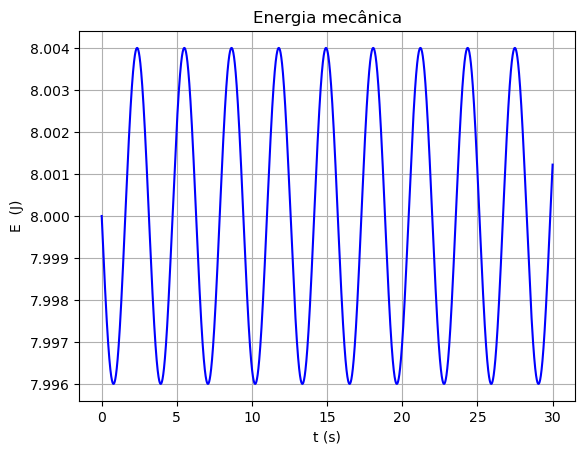

In [131]:
Ep = 1/2*k*x**2

plt.plot(t, Ep + 1/2*m*v**2, color="blue")
plt.ylabel("E  (J)")
plt.xlabel("t (s)")
plt.title("Energia mecânica")
plt.grid()
plt.show()

Neste gráfico o valor parece oscilar, no entanto se reparmos, esta oscilação é muita pequena ($\pm 0.004$), isto porque a oscilação deve-se a erros de aproximação.

A energia mecânica é constante ao longo do tempo.

# Exercício 2

Um corpo de massa 1 kg move-se num oscilador duplo, com dois pontos de equilíbrio, $x_\text{eq} = 1.5 \; \text{m}$. O oscilador tem a energia potencial

$$
E_p = \frac{1}{2} k \left(x^2 - x^2_\text{eq}\right)^2
$$

exerce no corpo a força

$$
F_x =  -2k \left(x^2 - x^2_\text{eq}\right)x
$$

onde $k = 1 \; \text{N/m}$.

In [54]:
# Dados
k = 1
m = 1
x_eq = 1.5

## Alínea A

Faça o diagrama de energia desta energia potencial (energia potencial em função do espaço). Qual o movimento quando a energia total for menor que 1J?

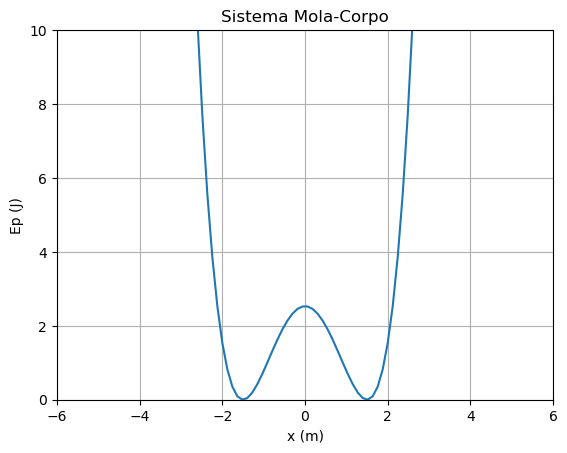

In [132]:
x_space = np.linspace(-6, 6, 100)

Ep = 1/2 * k * (x_space**2 - x_eq**2)**2

plt.plot(x_space, Ep)
plt.xlabel("x (m)")
plt.ylabel("Ep (J)")
plt.margins(0)
plt.ylim([0, 10])
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

Enquanto a energia total for menor que 1J, o movimento é oscilatório em torno do ponto $x_\text{eq} = 1.5 \; \text{m}$, nas posições onde a energia total é menor que 1J.

## Alínea B

Calcule a lei do movimento, quando a energia total for 0.75 J. Qual a amplitude e a frequência do movimento?

Começamos por calcular as condições iniciais do oscilador, se assumirmos que a velocidade inicial é nula temos que a energia cinética também o será, logo $E = E_p$.

Logo podemos calcular a posição inicial substituindo os valores na fórmula da energia potencial.

$$
\begin{align*}
0.75 &= 1/2 \times 1 \times \left(x_0^2 - 2.25\right)^2 \\
&\Leftrightarrow
1.5 = \left(x_0^2 - 2.25\right)^2 \\
&\Leftrightarrow
\sqrt{1.5} + 2.25 = x_0^2 \\
&\Leftrightarrow
x_0 =\sqrt{\sqrt{1.5} + 2.25}
\approx 1.864066756
\end{align*}
$$

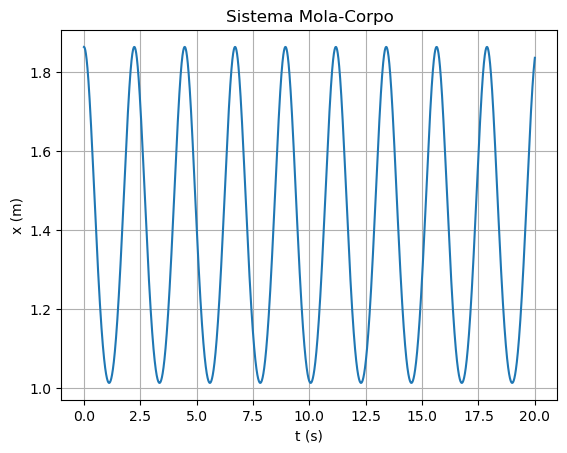

In [86]:
# Parâmetros
dt = 0.001 # δt - tamanho do passo
t0 = 0 # Tempo inicial
tf = 20.0 # Tempo final
x0 = 1.864066756 # Posição inicial
v0 = 0 # Velocidade inicial

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1) # Tempo
x = np.zeros(n + 1) # Posição
v = np.zeros(n + 1) # Velocidade
a = np.zeros(n + 1) # Aceleração

# Valores inicias
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
  a[i] = -2 * (k/m) * (x[i]**2 - x_eq**2) * x[i]
  v[i + 1] = v[i] + a[i] * dt
  x[i + 1] = x[i] + v[i + 1] * dt 
  t[i + 1] = t[i] + dt

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

In [133]:
def get_value(t, x):
    targetIdx = int(np.ceil(t / dt))
    return x[targetIdx]
    
t_max, x_max = interpolate_extremum(
    2, get_value(2, x),
    2.3, get_value(2.3, x),
    2.5, get_value(2.5, x),
)
t_min, x_min = interpolate_extremum(
    0.5, get_value(0.5, x),
    1, get_value(1, x),
    2, get_value(2, x),
)

A = (x_max - x_min)/2

In [75]:
display(Math(r'X_\text{{max}} = {:.2f} \; \text{{m}}'.format(x_max)))
display(Math(r'X_\text{{min}} = {:.2f} \; \text{{m}}'.format(x_min)))
display(Math(r'A = {:.2f} \; \text{{m}}'.format(A)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [80]:
# Interpolate period

t_max2, x_max2 = interpolate_extremum(
    4, get_value(4, x),
    4.5, get_value(4.5, x),
    5, get_value(5, x),
)

T = t_max2 - t_max # Should approximate 2pi
f = 1/T

In [83]:
display(Math(r'T = {:.3f} \; \text{{s}}'.format(T)))
display(Math(r'f = {:.3f} \; \text{{Hz}}'.format(f)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Alínea C

Calcule a lei do movimento quando a energia total for 3.0 J? Qual a amplitude e a frequência do movimento?

Utilizamos o mesmo metódo, começando por calcular a posição inicial.

$$
\begin{align*}
3 &= 1/2 \times 1 \times \left(x_0^2 - 2.25\right)^2 \\
&\Leftrightarrow
6 = \left(x_0^2 - 2.25\right)^2 \\
&\Leftrightarrow
\sqrt{6} + 2.25 = x_0^2 \\
&\Leftrightarrow
x_0 =\sqrt{\sqrt{6} + 2.25}
\approx 2.167830654
\end{align*}
$$

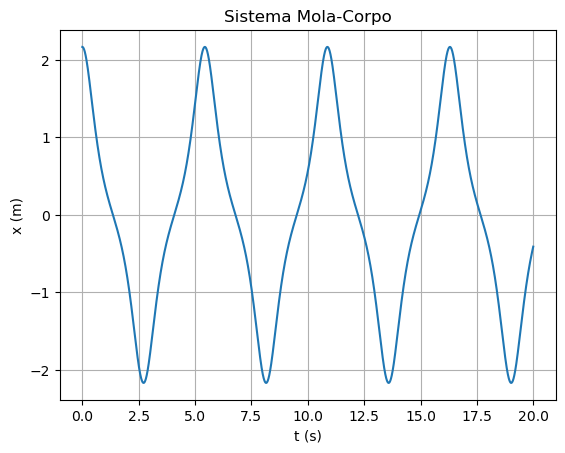

In [114]:
# Parâmetros
dt = 0.001 # δt - tamanho do passo
t0 = 0 # Tempo inicial
tf = 20.0 # Tempo final
x0 = 2.167830654 # Posição inicial
v0 = 0 # Velocidade inicial

# Número de passos/iterações
#
# + 0.1 para garantir que não há arrendodamentos
# para baixo
n = int((tf-t0) / dt + 0.1)

t = np.zeros(n + 1) # Tempo
x = np.zeros(n + 1) # Posição
v = np.zeros(n + 1) # Velocidade
a = np.zeros(n + 1) # Aceleração

# Valores inicias
v[0] = v0
t[0] = t0
x[0] = x0

for i in range(n):
  a[i] = -2 * (k/m) * (x[i]**2 - x_eq**2) * x[i]
  v[i + 1] = v[i] + a[i] * dt
  x[i + 1] = x[i] + v[i + 1] * dt 
  t[i + 1] = t[i] + dt

plt.plot(t, x)
plt.ylabel("x (m)")
plt.xlabel("t (s)")
plt.title("Sistema Mola-Corpo")
plt.grid()
plt.show()

Temos de ter cuidado a escolher os pontos de controlo pois agora as oscilações tem oscilações com concavidades e os pontos de controlo não podem ter concavidades entre eles (além da concavidade do extremo).

In [103]:
def get_value(t, x):
    targetIdx = int(np.ceil(t / dt))
    return x[targetIdx]
    
t_max, x_max = interpolate_extremum(
    5.2, get_value(5.2, x),
    5.4, get_value(5.4, x),
    5.6, get_value(5.6, x),
)
t_min, x_min = interpolate_extremum(
    2.5, get_value(2.5, x),
    2.6, get_value(2.6, x),
    2.7, get_value(2.7, x),
)

A = (x_max - x_min)/2

In [106]:
display(Math(r'X_\text{{max}} = {:.2f} \; \text{{m}}'.format(x_max)))
display(Math(r'X_\text{{min}} = {:.2f} \; \text{{m}}'.format(x_min)))
display(Math(r'A = {:.2f} \; \text{{m}}'.format(A)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [112]:
t_max2, x_max2 = interpolate_extremum(
    10.7, get_value(10.7, x),
    10.8, get_value(10.8, x),
    11, get_value(11, x),
)

T = t_max2 - t_max
f = 1/T

In [113]:
display(Math(r'T = {:.3f} \; \text{{s}}'.format(T)))
display(Math(r'f = {:.3f} \; \text{{Hz}}'.format(f)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>